In [222]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from skimage import color
from os import listdir
from os.path import isfile, join
import math
import random
import pprint
from skimage import color
from skimage.measure import structural_similarity as ssim

In [189]:
ipfolder = "C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\bedroomip"
opfolder = "C:\\DragonBallZ\\Summer2018\\Video_Image_Processing_GANS\\sharedVBOX\\bedroomop"

In [190]:
inpImgList= []

In [191]:
def numeric_chars2(x):
    y = x[5:-4]
    return(int(y))

In [58]:
random.seed(7)

In [192]:
ipfiles = [f for f in os.listdir(ipfolder)]

In [193]:
opfiles = [f for f in os.listdir(opfolder)]

In [194]:
l1 = list(np.random.choice(ipfiles,64,replace=False))
l2 = list(np.random.choice(opfiles,64,replace=False))

In [201]:
l2 = sorted(l2,key = numeric_chars2)
l2

['image35.png',
 'image223.png',
 'image303.png',
 'image343.png',
 'image457.png',
 'image477.png',
 'image480.png',
 'image515.png',
 'image629.png',
 'image632.png',
 'image636.png',
 'image670.png',
 'image684.png',
 'image894.png',
 'image930.png',
 'image946.png',
 'image978.png',
 'image1128.png',
 'image1309.png',
 'image1401.png',
 'image1564.png',
 'image1662.png',
 'image1789.png',
 'image2059.png',
 'image2167.png',
 'image2226.png',
 'image2235.png',
 'image2358.png',
 'image2359.png',
 'image2470.png',
 'image2742.png',
 'image2877.png',
 'image2891.png',
 'image2946.png',
 'image3027.png',
 'image3053.png',
 'image3059.png',
 'image3182.png',
 'image3245.png',
 'image3276.png',
 'image3414.png',
 'image3857.png',
 'image3885.png',
 'image3895.png',
 'image3902.png',
 'image4108.png',
 'image4147.png',
 'image4152.png',
 'image4225.png',
 'image4408.png',
 'image4476.png',
 'image4717.png',
 'image4774.png',
 'image5105.png',
 'image5162.png',
 'image5380.png',
 'image539

In [202]:
len(l1)

64

In [203]:
def populateImageList(inpImgList,out_img,size):
    listSize = [(size*i)/8 for i in range(0,8)]
    imgList = []
    outImgList = [] 
    for col in listSize:
        for row in listSize:
            area = (row,col,row+(size/8),col+(size/8))
            out_img_grid = out_img.crop(area)
            outImgList.append(out_img_grid)
    imgList.extend(inpImgList)
    imgList.extend(outImgList)
    return imgList

In [204]:
def standardizeImageList(imgList):
    new_width,new_height = 64,64
    imgList = [i.resize((new_width, new_height), Image.ANTIALIAS) for i in imgList]
    return imgList
    
    

In [205]:
def imgToArray(imgList):
    npArray = []
    for i in imgList:
        I = np.asarray(i.convert('L'))
        npArray.append(I)
    return npArray
        

In [206]:
def compute2Norm(u,v):
    i = u - v
    return np.linalg.norm(i) 

In [213]:
def createDictOf2NormValues(npArray):
    startIndex = 0
    d = {}
    for i in npArray:
        lst = []
        for j in npArray:
            val = compute2Norm(i,j)
            if val == 0:
                val = float("inf")
            lst.append(val)
        d[startIndex] = lst
        startIndex+=1
    return d

In [219]:
def getAccuracy(d):
    count = 0 
    for k in d.keys():
        valList = d[k]
        minIndex = valList.index(min(valList))
        if (k <= 63 and minIndex <=63) or (k > 63 and minIndex > 63):
            count+=1
    #print("count ",count)
    acc = (count/128.0)*100 
    return acc        
        
    

In [209]:
label = [0 if i<64 else 1 for i in range(128)] #0 indicates input class and 1 output class
opclass = [i for i in range(1,65)]

In [210]:
inpImgList = []
for ip in l1:
    ippath = os.path.join(ipfolder,ip)
    img = Image.open(ippath)
    inpImgList.append(img)


In [220]:
accList = []
d = {}
for opimage in l2:
    oppath = os.path.join(opfolder,opimage)
    out_img = Image.open(oppath)
    size = out_img.size[0]
    imgList = populateImageList(inpImgList,out_img,size)
    imgList = standardizeImageList(imgList)
    npArray = imgToArray(imgList)
    d = createDictOf2NormValues(npArray)
    acc = getAccuracy(d)
    accList.append(acc)

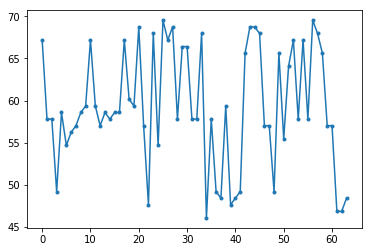

In [221]:
plt.plot(accList,'.-')
plt.show()